In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator


In [109]:
df = pd.read_csv(r"C:\Users\Asus\Desktop\datasets\indian_food.csv")

                 

In [110]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [111]:
df.shape

(255, 9)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [113]:
df.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


In [114]:
df.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [115]:
df.isnull().any().sum()

1

In [116]:
df.rename(columns={'name': 'Name', 'ingredients': 'Ingredients', 'diet': 'Veg/NonVeg', 'prep_time': 'PrepTime', 'flavor_profile':'FlavorProfile', 'course':'Course', 'state': 'State', 'region': 'Region'}, inplace = True)


In [117]:
df.head()

,Name,Ingredients,Veg/NonVeg,PrepTime,cook_time,FlavorProfile,Course,State,Region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


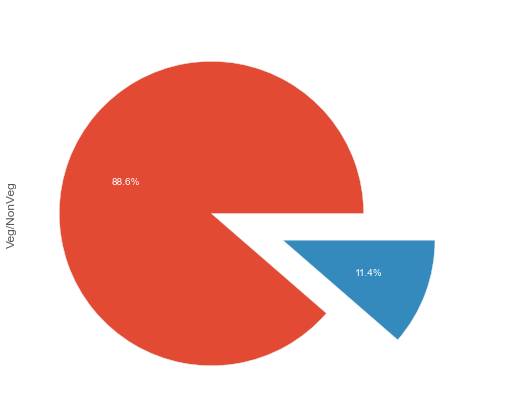

In [118]:
plt.style.use("ggplot")

df['Veg/NonVeg'].value_counts().plot.pie(figsize = (15,7), explode=(0,0.5), autopct='%1.1f%%')
plt.title("Vegetarians VS Non Vegetarians")
plt.show()

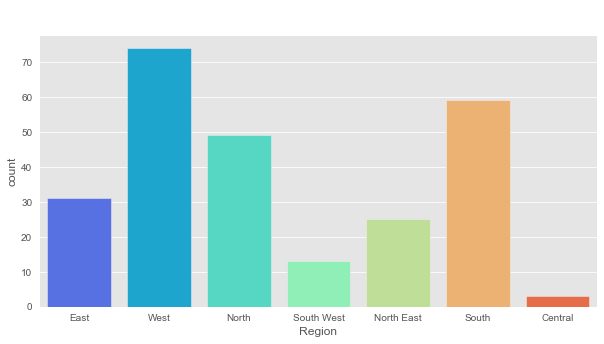

In [119]:
df['Region'] = df['Region'].replace(['-1'],'South West')
plt.figure(figsize = (10,5))

sns.countplot(x = df['Region'], palette='rainbow')
plt.title('Number of dishes based on region', fontsize=30)
plt.show()



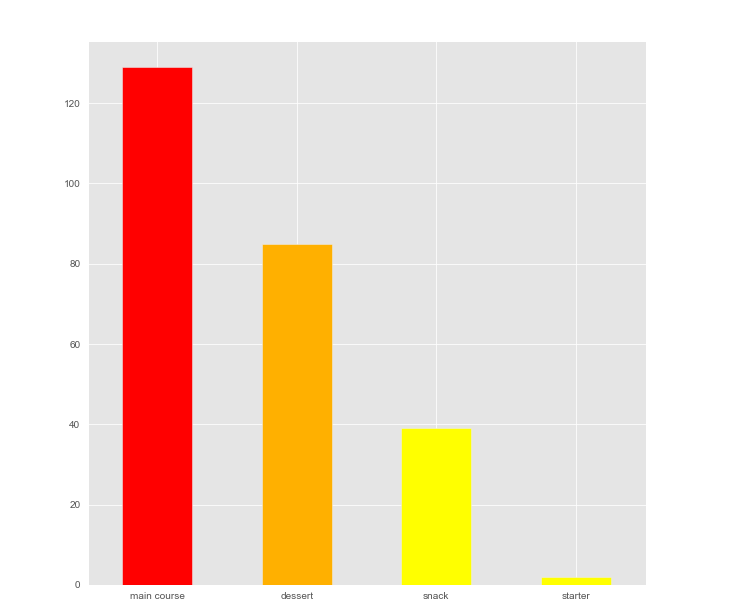

In [120]:
plt.rcParams['figure.figsize'] = (10,8)
color = plt.cm.autumn(np.linspace(0,20,30))

df['Course'].value_counts().plot.bar(color = color, figsize = (10,10))
plt.title('Number of dishes based on meal course', fontsize = 40)
plt.xticks(rotation = 0)
plt.show()


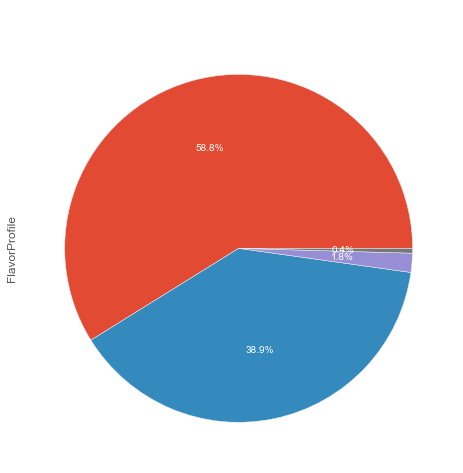

In [121]:

df = df.replace('-1',np.nan)
plt.style.use('ggplot')
df['FlavorProfile'].value_counts().plot.pie(figsize=(20,8), explode = (0,0,0, 0,), autopct = '%1.1f%%')
plt.title('Flavor Profile', fontsize = 25)
plt.show()


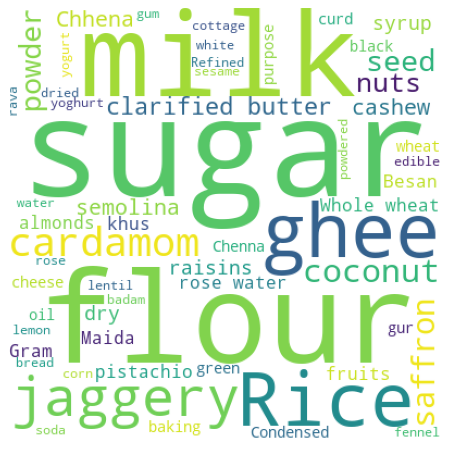

In [122]:
ingredients = []

desserts = df[df['Course']=='dessert'].reset_index()


#this one is a bit confusing
#we are trying to extract each ingredient for desserts only from the entire dataset
#for index in the rows with desserts as course, split the words b/a comma for all the index in Ingredients column.
#then join them again with comma and assign to text
#then append the ingredients with the text
#now join the ingredients with a space

for i in range(0,len(desserts)):
    text = desserts['Ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)
    
wordcloud = WordCloud(width = 400, height = 400, background_color = 'white', min_font_size = 10).generate(text)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

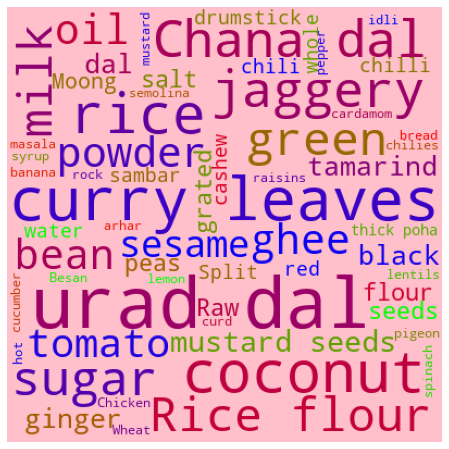

In [123]:
southdf = df[df['Region']=='South'].reset_index()

ingredients = []
for i in range(0, len(southdf)):
    text = southdf['Ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)
    
wordcloud = WordCloud(width = 400, height = 400, background_color = 'pink', min_font_size = 10,colormap="brg").generate(text)
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [124]:
sweet_df = df[df['FlavorProfile']=='sweet']
final_sweet_df = sweet_df[sweet_df['Course']!='dessert']
final_sweet_df

,Name,Ingredients,Veg/NonVeg,PrepTime,cook_time,FlavorProfile,Course,State,Region
46,Obbattu holige,"Maida flour, turmeric, coconut, chickpeas, jag...",vegetarian,180,60,sweet,main course,Karnataka,South
85,Dal makhani,"Red kidney beans, urad dal, cream, garam masal...",vegetarian,10,60,sweet,main course,Punjab,North
243,Mishti Chholar Dal,"Chana dal, fresh coconut, ginger, cinnamon, ra...",vegetarian,10,30,sweet,main course,West Bengal,East


In [125]:
df['cook_time ']

0      25
1      30
2      60
3      30
4      40
       ..
250    30
251    60
252    -1
253    45
254    -1
Name: cook_time , Length: 255, dtype: int64

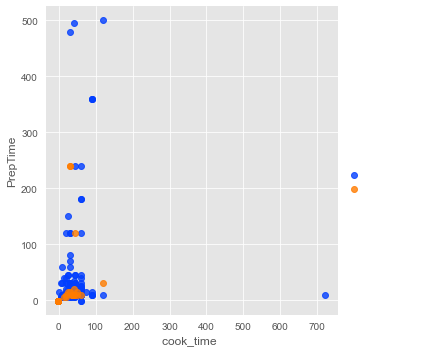

In [126]:
sns.lmplot(x="cook_time ", y = "PrepTime", hue="Veg/NonVeg",fit_reg=False, data = df,palette="bright")
sns.set_style("darkgrid")
plt.show()


In [127]:
df.dtypes

Name             object
Ingredients      object
Veg/NonVeg       object
PrepTime          int64
cook_time         int64
FlavorProfile    object
Course           object
State            object
Region           object
dtype: object

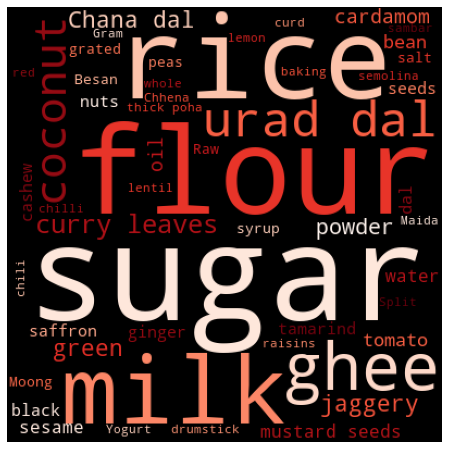

In [128]:

nveg_df = df[df['Veg/NonVeg']=='non vegetarian'].reset_index()


for i in range(0, len(nveg_df)):
    text = df['Ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

wordcloud = WordCloud(width = 400, height = 400, background_color ='black', 
                min_font_size = 10, colormap = 'Reds_r').generate(text)                  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

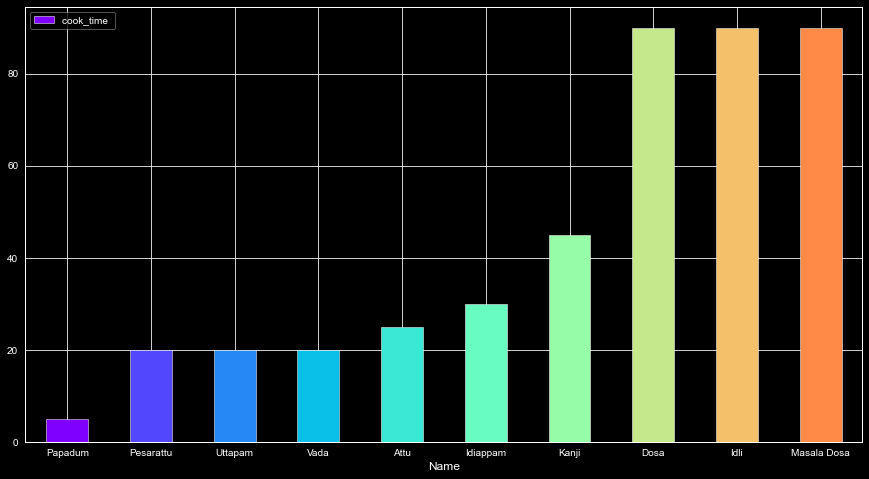

In [129]:
plt.style.use('dark_background')
df = df[df['Region']=='South']
snackdf = df[df['Course']=='snack']
color = plt.cm.rainbow(np.linspace(0, 1,12))
snackdf.sort_values('cook_time ').head(10).plot.bar(x = 'Name', y = 'cook_time ',color=color, figsize = (15,8))

plt.xticks(rotation = 0)
plt.show()


In [130]:
df


,Name,Ingredients,Veg/NonVeg,PrepTime,cook_time,FlavorProfile,Course,State,Region
37,Ariselu,"Rice flour, jaggery, ghee",vegetarian,15,75,sweet,dessert,Andhra Pradesh,South
38,Bandar laddu,"Besan, jaggery, cardamom powder, ghee, cashews...",vegetarian,5,35,sweet,dessert,Andhra Pradesh,South
40,Dharwad pedha,"Milk, Sugar, Dharwadi buffalo milk",vegetarian,20,60,sweet,dessert,Karnataka,South
41,Double ka meetha,"Loaf bread, milk",vegetarian,20,30,sweet,dessert,Telangana,South
42,Gavvalu,"Rice flour, sugar, salt, ghee, semolina",vegetarian,10,30,sweet,dessert,Andhra Pradesh,South
43,Kakinada khaja,"Wheat flour, sugar",vegetarian,10,30,sweet,dessert,Andhra Pradesh,South
44,Kuzhi paniyaram,"Black lentils, rice",vegetarian,10,20,sweet,dessert,Kerala,South
45,Mysore pak,"Besan flour, semolina, mung bean, jaggery, coc...",vegetarian,5,20,sweet,dessert,Karnataka,South
46,Obbattu holige,"Maida flour, turmeric, coconut, chickpeas, jag...",vegetarian,180,60,sweet,main course,Karnataka,South
47,Palathalikalu,"Rice flour, milk",vegetarian,10,25,sweet,dessert,Andhra Pradesh,South


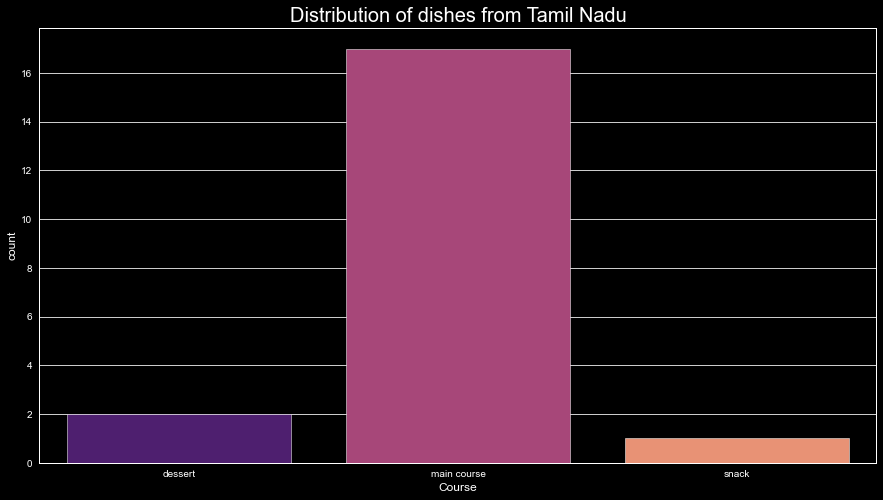

In [131]:
df = df[df['State'] == 'Tamil Nadu']
plt.figure(figsize = (15,8))
sns.countplot(x = df['Course'], palette = 'magma')
plt.title("Distribution of dishes from Tamil Nadu", fontsize = 20)
plt.show()

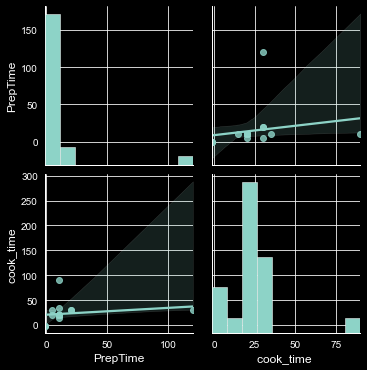

In [134]:
sns.pairplot(df, kind ="reg")
plt.show()